In [3]:
import os
from sqlalchemy import create_engine
import dotenv
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz

sns.set(style="darkgrid", palette="muted", color_codes=True)

In [4]:
# Load Database
dotenv.load_dotenv()
engine = create_engine(os.environ.get("POSTGRES_URI"), pool_pre_ping=True)

In [5]:
df = pd.read_sql(sqlalchemy.text("SELECT * from inventory_ledger"), engine)
df.head()

,id,timestamp,red_ml,green_ml,blue_ml,dark_ml,gold,description
0,16,2023-10-19 00:59:03.937582+00:00,2500,2500,2500,2600,108740,Manual Entry from Legacy System
1,23,2023-10-19 02:26:06.294549+00:00,-2500,-2500,-2500,-300,0,Bottle Delivery
2,24,2023-10-19 02:37:07.126229+00:00,0,0,0,0,525,Checkout for Cart #799
3,25,2023-10-19 02:37:07.127565+00:00,0,0,0,0,315,Checkout for Cart #800
4,26,2023-10-19 02:37:07.128129+00:00,0,0,0,0,45,Checkout for Cart #801


In [15]:
df_current_values = df.sort_values(by='timestamp')
for stock_type in ['red_ml', 'green_ml', 'blue_ml', 'dark_ml', 'gold']:
    df_current_values[stock_type + "_curr"] = df_current_values[stock_type].cumsum()
df_current_values['nice_timestamp'] = df_current_values['timestamp'].dt.tz_convert("America/Los_Angeles").dt.strftime('%m-%d %I:%M %p')
df_current_values = df_current_values.melt(id_vars=["timestamp", "nice_timestamp"], 
        var_name="StockType", 
        value_name="Value")
df_current_values.tail()

,timestamp,nice_timestamp,StockType,Value
2551,2023-10-19 20:46:07.924557+00:00,10-19 01:46 PM,gold_curr,134000
2552,2023-10-19 20:46:07.928906+00:00,10-19 01:46 PM,gold_curr,134450
2553,2023-10-19 20:46:07.987268+00:00,10-19 01:46 PM,gold_curr,134585
2554,2023-10-19 20:46:07.994130+00:00,10-19 01:46 PM,gold_curr,134945
2555,2023-10-19 20:46:08.014469+00:00,10-19 01:46 PM,gold_curr,135125


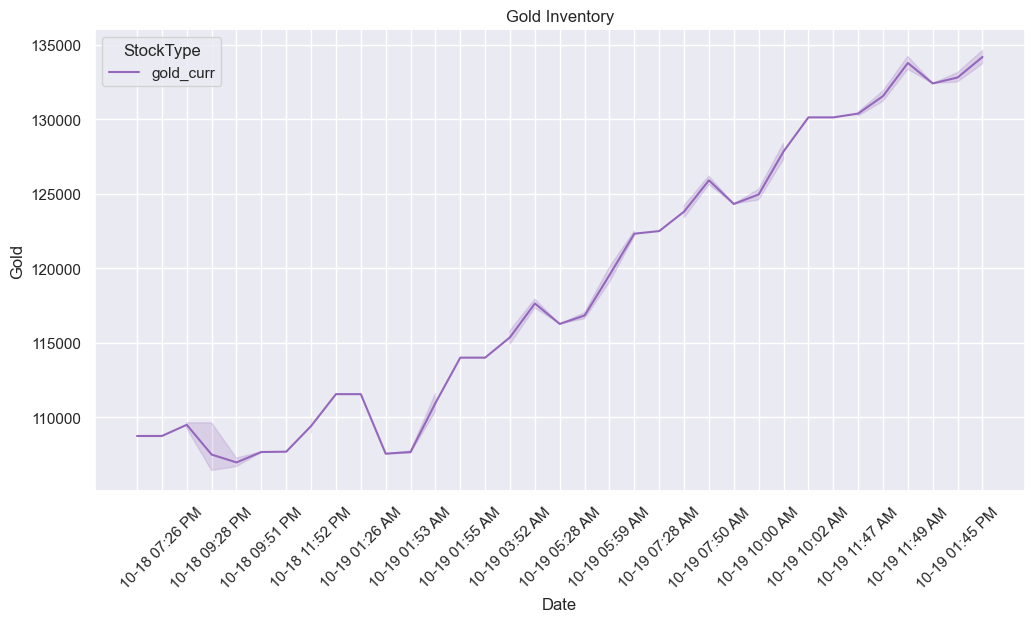

In [29]:
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(data=df_current_values[df_current_values['StockType'] == "gold_curr"],hue='StockType', x='nice_timestamp', y='Value',palette=['tab:purple'], ax=ax)
ax.set(xlabel='Date', ylabel='Gold', title='Gold Inventory')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
_ = plt.xticks(rotation=45)

,timestamp,nice_timestamp,StockType,Value
0,2023-10-19 00:59:03.937582+00:00,10-18 05:59 PM,id,16
1,2023-10-19 02:26:06.294549+00:00,10-18 07:26 PM,id,23
2,2023-10-19 02:37:07.126229+00:00,10-18 07:37 PM,id,24
3,2023-10-19 02:37:07.127565+00:00,10-18 07:37 PM,id,25
4,2023-10-19 02:37:07.128129+00:00,10-18 07:37 PM,id,26
...,...,...,...,...
2551,2023-10-19 20:46:07.924557+00:00,10-19 01:46 PM,gold_curr,134000
2552,2023-10-19 20:46:07.928906+00:00,10-19 01:46 PM,gold_curr,134450
2553,2023-10-19 20:46:07.987268+00:00,10-19 01:46 PM,gold_curr,134585
2554,2023-10-19 20:46:07.994130+00:00,10-19 01:46 PM,gold_curr,134945


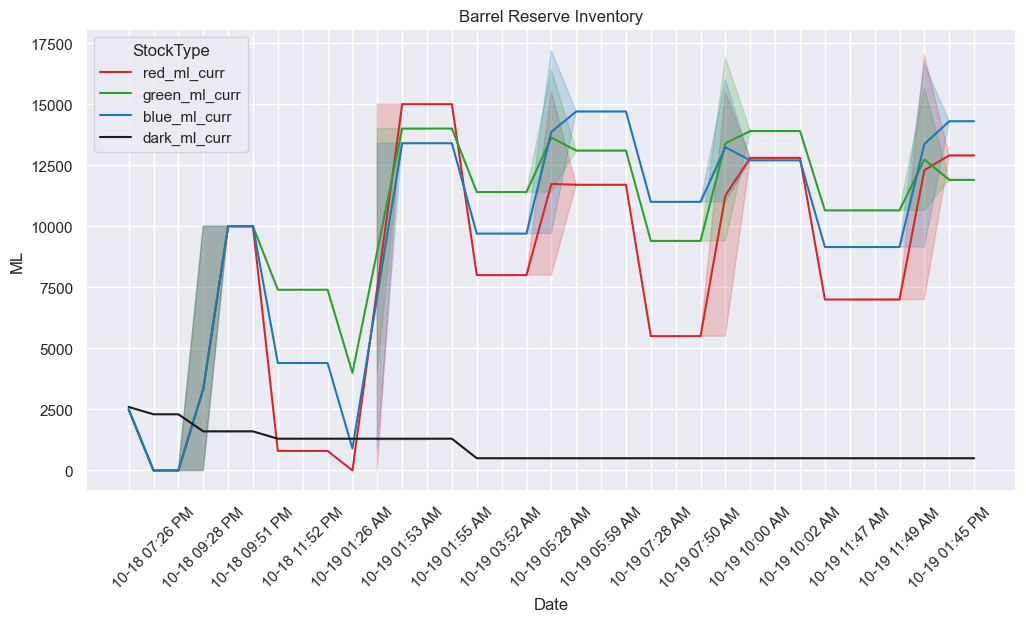

In [25]:
fig, ax = plt.subplots(figsize = (12,6))

red_green_blue_dark_values = df_current_values[
    (df_current_values['StockType'] == "red_ml_curr")
    | (df_current_values['StockType'] == "green_ml_curr")
    | (df_current_values['StockType'] == "blue_ml_curr")
    | (df_current_values['StockType'] == "dark_ml_curr")
    ][['nice_timestamp', 'StockType', 'Value']]



fig = sns.lineplot(data=red_green_blue_dark_values, x='nice_timestamp', y='Value', hue='StockType', palette=['tab:red','tab:green', 'tab:blue','k'], ax=ax)
ax.set(xlabel='Date', ylabel='ML', title='Barrel Reserve Inventory')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
_ = plt.xticks(rotation=45)